<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

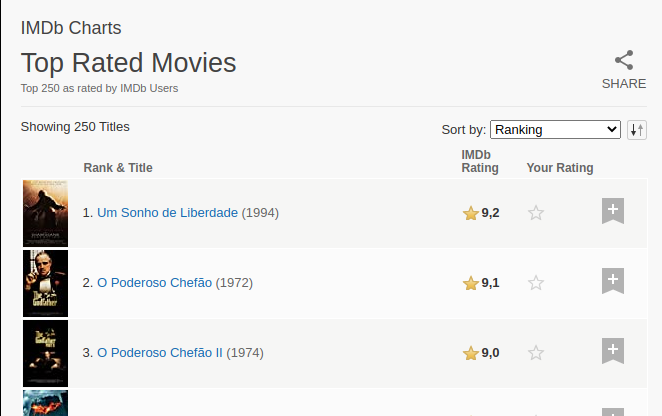

### **1.1. Arquivo Robots.txt** 

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`. 

In [1]:
# solução do exercício 1.1

import requests
from requests.exceptions import HTTPError
robots = None
URL = 'https://www.imdb.com/robots.txt'
try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  robots = resposta.text
  if 'top' in robots or 'charts' in robots:
    print(True)
  else:
     print(False)
print(robots)


False
# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft

User-agent: Baiduspider
Disallow: /list/*
D

**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping** 

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [2]:
# a) Utilize o pacote requests para fazer o download da página na variável conteudo

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/chart/top/'
try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  conteudo = resposta.text
print(conteudo)
... # continue o codigo aqui




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">

    
    
    

    
    
    




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Top 250 Movies - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>

        <link rel="canonical" href="https://www.imdb.com/chart/top/" />
        <meta property="og:url" 

Ellipsis

In [3]:
import requests
from requests.exceptions import HTTPError
def crawl_website(url: str) -> str:
  try:
    resposta = requests.get(url)
    resposta.raise_for_status()
  except HTTPError as exc:
   print(exc)
  else:
    return resposta.text

In [4]:
URL = 'https://www.imdb.com/chart/top/'
conteudo = crawl_website(url=URL)
with open(file='imbd.html', mode='w', encoding='utf8') as arquivo:
   arquivo.write(conteudo)

In [5]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina

from bs4 import BeautifulSoup

pagina = BeautifulSoup(open('imbd.html', mode='r'), 'html.parser')
# continue o codigo aqui

In [6]:
# c) Utilize o código abaixo para iterar nas linhas e colunas da tabela e preencher a variavel conteudo_extraido

conteudo_extraido = []

tabela = pagina.find('table', {'class': 'chart'})

for linha in tabela.find_all('tr'):
  textos_coluna = list()

  for coluna in linha.find_all('td'):
    texto_coluna = coluna.get_text().strip().split('\n')
    textos_coluna += texto_coluna
  conteudo_extraido.append(textos_coluna[1:5])
  
conteudo_extraido = (conteudo_extraido[1:11])
 
#Armazenando em variáveis e removendo caracteres desnecessários!

imdb_top = []
for filme in conteudo_extraido:
    ranking=filme[0].replace('.','')
    nome=filme[1].replace(' ', '',6)
    ano=filme[2].replace('(','').replace(')','')
    nota=filme[3]
    imdb_top.append([ranking,nome,ano,nota])
print(imdb_top)

[['1', 'The Shawshank Redemption', '1994', '9.2'], ['2', 'The Godfather', '1972', '9.2'], ['3', 'The Dark Knight', '2008', '9.0'], ['4', 'The Godfather Part II', '1974', '9.0'], ['5', '12 Angry Men', '1957', '9.0'], ['6', "Schindler's List", '1993', '8.9'], ['7', 'The Lord of the Rings: The Return of the King', '2003', '8.9'], ['8', 'Pulp Fiction', '1994', '8.8'], ['9', 'The Lord of the Rings: The Fellowship of the Ring', '2001', '8.8'], ['10', 'The Good, the Bad and the Ugly', '1966', '8.8']]


**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
[]
['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '2.', '      The Godfather', '(1972)', '9.1', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '3.', '      The Godfather: Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '4.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '5.', '      12 Angry Men', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
```

In [7]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido

... # continue o codigo aqui
import csv
with open(file='./imdb.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=',')
  escritor_csv.writerows(
   [['ranking','titulo','ano','nota']] + imdb_top)


---

## 2\. Bônus: Projeto em destaque do GitHub

**Nota**: Este exercício não é obrigatório.

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade: 

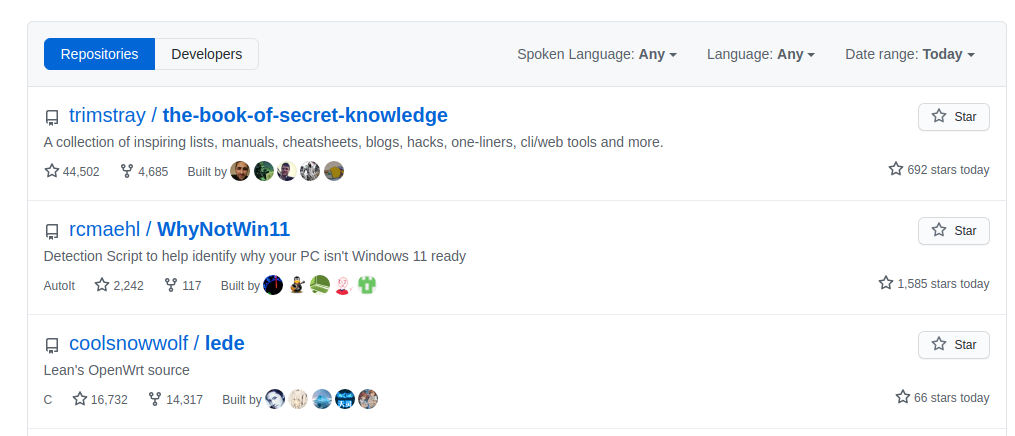

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv` separado por `;` no seguinte formato:

```
ranking;project;language;stars;stars_today;forks
1;the-book-of-secret-knowledge;;44502;692;4685
2;whynotwin11;autoit;2242;1585;117
3;lede;c;16732;66;14317
```

**Nota**: Confira o arquivo `robots.txt` do website.

In [ ]:
# solução do exercício 2
import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://github.com/trending'
try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  conteudo = resposta.text
print(conteudo)

In [9]:
import requests
from requests.exceptions import HTTPError
def crawl_website(url: str) -> str:
  try:
    resposta = requests.get(url)
    resposta.raise_for_status()
  except HTTPError as exc:
   print(exc)
  else:
    return resposta.text

In [10]:
URL = 'https://github.com/trending'
conteudo = crawl_website(url=URL)
with open(file='github.html', mode='w', encoding='utf8') as arquivo:
   arquivo.write(conteudo)

In [11]:
from bs4 import BeautifulSoup

paginagit = BeautifulSoup(open('github.html', mode='r'), 'html.parser')

In [12]:
conteudogit_extraido = []

projeto = paginagit.find('div', {'class': 'pt-6'})
tabela = projeto.find_all('article')

#nome dos projetos


In [15]:
ranking=[]
for i in range(1,11):
    ranking.append(i)

print(ranking)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [65]:
stars=[]
forks=[]
for item in tabela:
  conjunto = item.find_all('a',{'class' :  "Link--muted d-inline-block mr-3"})
  stars.append(conjunto[0].get_text().strip().replace("\n","").replace(" ","").replace(",","."))
  forks.append(conjunto[1].get_text().strip().replace("\n","").replace(" ","").replace(",","."))
  stars= stars[0:10]
  forks= forks[0:10]
  

In [64]:
print(stars)

['14.266', '1.840', '1.138', '69.609', '46.137', '664', '21.516', '18.735', '17.520', '355.745']


In [66]:
print(forks)

['426', '43', '97', '6.510', '6.620', '11', '1.702', '845', '1.052', '30.083']


In [68]:
linguagem=[]
for item in tabela:
  if 'programmingLanguage' in str(item):
    linguagem.append(item.find('span',{'itemprop': 'programmingLanguage'}).get_text().strip())
  else:
    linguagem.append('')
linguagem=linguagem[0:10]
print(linguagem)
#span itemprop="programmingLanguage"

['C++', 'Go', 'TypeScript', 'Shell', '', 'Rust', '', 'Clojure', 'Clojure', 'TypeScript']


In [83]:
nome=[]
for item in tabela:
  nome.append(item.find('h1',{'class': 'h3 lh-condensed'}).get_text().strip().replace("\n","").replace(" ","").replace("/"," "))
nome= nome[0:10] 
print(nome)

['dragonflydb dragonfly', 'dunglas frankenphp', 'cisagov RedEye', 'gothinkster realworld', 'Developer-Y cs-video-courses', 'fruiframework frui', 'The-Run-Philosophy-Organization run', 'penpot penpot', 'logseq logseq', 'freeCodeCamp freeCodeCamp']


In [70]:
stars_today = []
for item in tabela:
  stars_today.append(item.find('span',{'class' : 'd-inline-block float-sm-right'}).get_text().strip().replace("stars today",""))
stars_today = stars_today[0:10] 
print(stars_today)

['506 ', '475 ', '311 ', '74 ', '134 ', '226 ', '69 ', '139 ', '135 ', '170 ']


In [84]:
import csv
with open(file='./github.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=',')
  escritor_csv.writerows(
   [['ranking','project','language','stars','stars_today','forks']] + \
   list(map(lambda ranking,nome,linguagem,stars,stars_today,forks: [ranking,nome,linguagem,stars,stars_today,forks],ranking,nome,linguagem,stars,stars_today,forks))
)
